## Microlensing within SLSim
### Author: [Paras Sharma](https://github.com/timedilatesme)

### For running on Seawulf cluster
```bash
module load slurm
srun -J [job_name] -N 1 -p a100 --gpus=1 --pty bash
module load cuda120/toolkit/12.0
jupyter notebook --ip=0.0.0.0 --no-browser --port=8888
```
Then from jupyter notebook, under `Kernel` $\Rightarrow$ `Select Another kernel` $\Rightarrow$ `Existing Jupyter Server` $\Rightarrow$ `Enter the URL of the running Jupyter server`. Copy the URL from the terminal where you started the jupyter notebook and paste it here.

In [1]:
from slsim.Microlensing.magmap import MagnificationMap
from slsim.Microlensing.lightcurve import MicrolensingLightCurve
from matplotlib import pyplot as plt
import numpy as np
from slsim.Microlensing.lightcurvelensmodel import MicrolensingLightCurveFromLensModel
from slsim.Util.astro_util import theta_star_physical

# might not need all of these
from astropy.cosmology import FlatLambdaCDM
from astropy.units import Quantity
from slsim.lens_pop import LensPop

from astropy import constants as const
from astropy import units as u

import slsim.Sources as sources
import slsim.Deflectors as deflectors
import slsim.Pipelines as pipelines
from slsim.Sources.QuasarCatalog.quasar_pop import QuasarRate

### 1. Microlensing Map Generation


Done shooting cells. Elapsed time: 0.252 seconds.

Generating star field...
Done generating star field. Elapsed time: 0 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.078 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.087 seconds.

Shooting cells...
100 %

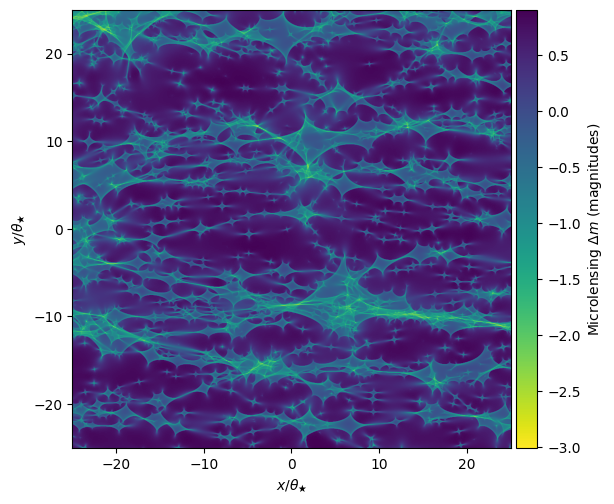

In [ ]:
kwargs_MagnificationMap = {
    "kappa_tot": 0.34960889,
    "shear": 0.34860889,
    "kappa_star": 0.24,
    "theta_star": 4e-6,  # arcsec
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 25 * 4e-6,  # arcsec
    "half_length_y": 25 * 4e-6,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 1000,
    "num_pixels_y": 1000,
    "kwargs_IPM": {},
}
magmap = MagnificationMap(
    **kwargs_MagnificationMap,
)
# save the magnification map
# np.save("/gpfs/home/passharma/repos/self/slsim/tests/TestData/test_magmap2D.npy", magmap.magnifications)
magmap.plot_magnification_map(cmap="viridis_r", origin="lower")

### 2. Light Curve Extraction Using a Microlensing Map

#### 2.1 Point Source


Done shooting cells. Elapsed time: 0.216 seconds.

Generating star field...
Done generating star field. Elapsed time: 0 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.079 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.087 seconds.

Shooting cells...
100 %

Text(0.5, 0.98, 'Point Source Microlensing Lightcurves')

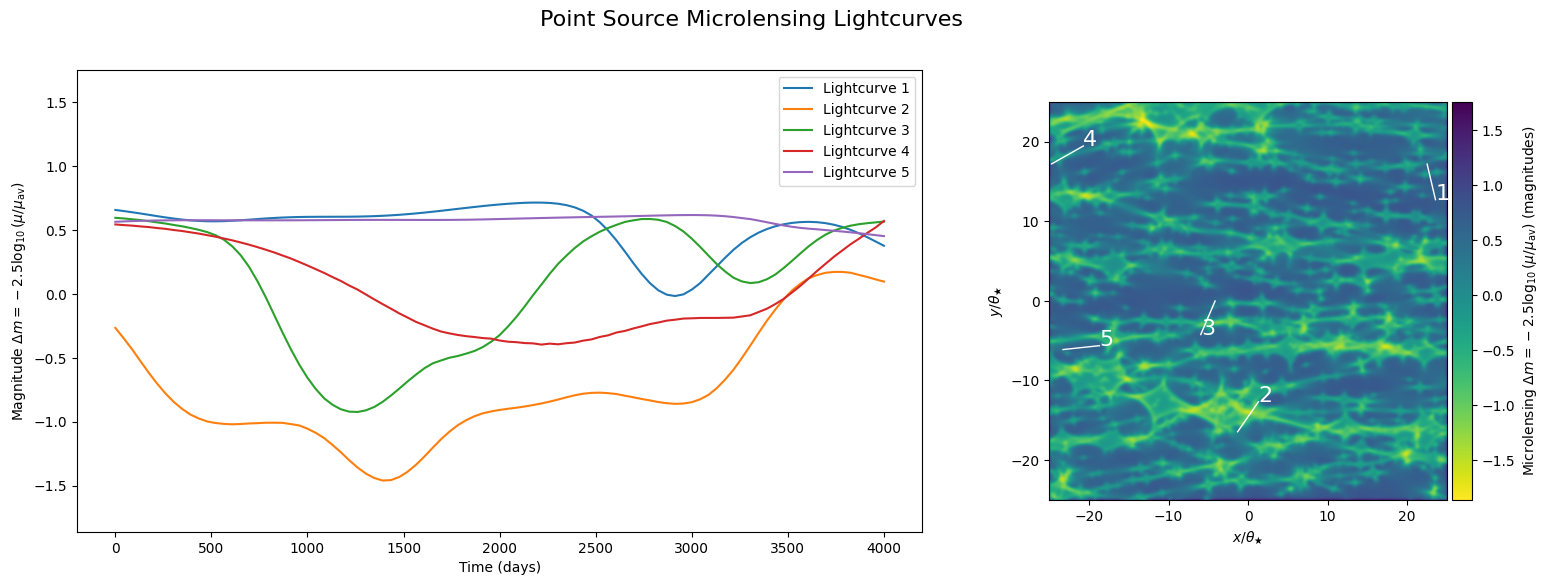

In [ ]:
kwargs_MagnificationMap = {
    "kappa_tot": 0.34960889,
    "shear": 0.34860889,
    "kappa_star": 0.24,
    "theta_star": 4e-6,  # arcsec
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 25 * 4e-6,  # arcsec
    "half_length_y": 25 * 4e-6,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 1000,
    "num_pixels_y": 1000,
    "kwargs_IPM": {},
}

magmap = MagnificationMap(
    # magnifications_array=np.load(
    #     "/gpfs/home/passharma/repos/self/slsim/tests/TestData/test_magmap2D.npy"
    # ),  # loading for testing
    **kwargs_MagnificationMap,
)

ml_lc = MicrolensingLightCurve(magmap, time_duration=4000)

LCs, tracks = ml_lc.generate_point_source_lightcurve(
    source_redshift=0.5,
    deflector_redshift=0.2,
    cosmology=FlatLambdaCDM(H0=70, Om0=0.3),
    source_size=8e-7,  # arcsec, this is the size of typical AGN Disk
    effective_transverse_velocity=10000,  # km/s
    num_lightcurves=5,
    return_track_coords=True,
    lightcurve_type="magnitude",
)

ax = ml_lc.plot_lightcurves_and_magmap(
    LCs,
    tracks,
    lightcurve_type="magnitude",
)

ax[0].figure.suptitle(
    "Point Source Microlensing Lightcurves",
    fontsize=16,
)

#### 2.2 AGN Disk


Done shooting cells. Elapsed time: 0.823 seconds.

Generating star field...
Done generating star field. Elapsed time: 0 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.088 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.096 seconds.

Shooting cells...
100 %

Text(0.5, 0.98, 'AGN Disk Microlensing Lightcurves')

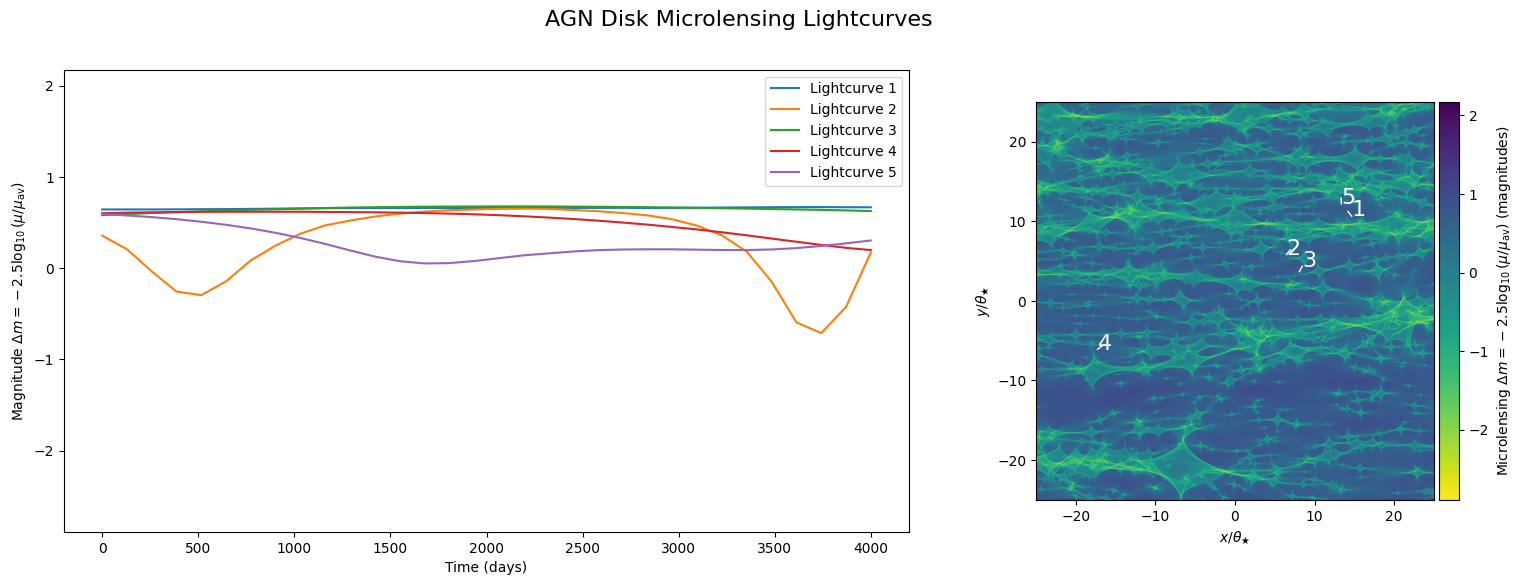

In [13]:
source_redshift = 2.467248566851947
deflector_redshift = 0.6688619611721243

theta_star, _, _ = theta_star_physical(
    z_lens=deflector_redshift,
    z_src=source_redshift,
    m=1,
    cosmo=FlatLambdaCDM(H0=70, Om0=0.3),
)
theta_star = theta_star.to(u.arcsec).value

kwargs_MagnificationMap = {
    "kappa_tot": 0.37405285,
    "shear": 0.37623754,
    "kappa_star": 0.24271499,
    "theta_star": theta_star,  # arcsec
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 25 * theta_star,  # arcsec
    "half_length_y": 25 * theta_star,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 2000,
    "num_pixels_y": 2000,
}

magmap = MagnificationMap(
    **kwargs_MagnificationMap,
)

ml_lc = MicrolensingLightCurve(magmap, time_duration=4000)

LCs, tracks = ml_lc.generate_agn_lightcurve(
    source_redshift=source_redshift,
    deflector_redshift=deflector_redshift,
    cosmology=FlatLambdaCDM(H0=70, Om0=0.3),
    v_transverse=1000,  # This is too fast for the AGN, typically 1000 km/s, but we are using 10000 km/s for longer lightcurves
    smbh_mass_exp=8,
    inclination_angle=0,
    observer_frame_wavelength_in_nm=600,
    eddington_ratio=0.15,
    mean_microlens_mass_in_kg=1 * const.M_sun.to(u.kg),
    num_lightcurves=5,
    return_track_coords=True,
    lightcurve_type="magnitude",
)

ax = ml_lc.plot_lightcurves_and_magmap(
    LCs,
    tracks,
    lightcurve_type="magnitude",
)

ax[0].figure.suptitle(
    "AGN Disk Microlensing Lightcurves",
    fontsize=16,
)

### 3. Light Curve Extraction for images of point sources in the Lens Class

In [17]:
# define a cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# define a sky area
galaxy_sky_area = Quantity(value=1, unit="deg2")
quasar_sky_area = Quantity(value=1, unit="deg2")
full_sky_area = Quantity(value=5, unit="deg2")


# define limits in the intrinsic deflector and source population (in addition
# to the skypy config
# file)
kwargs_deflector_cut = {"band": "i", "band_max": 28, "z_min": 0.01, "z_max": 2.5}
kwargs_source_cut = {"band": "i", "band_max": 26, "z_min": 0.001, "z_max": 5.0}

# generate galaxy population using skypy pipeline.
galaxy_simulation_pipeline = pipelines.SkyPyPipeline(
    skypy_config=None, sky_area=galaxy_sky_area, filters=None, cosmo=cosmo
)

# Initiate deflector population class
lens_galaxies = deflectors.AllLensGalaxies(
    red_galaxy_list=galaxy_simulation_pipeline.red_galaxies,
    blue_galaxy_list=galaxy_simulation_pipeline.blue_galaxies,
    kwargs_cut=kwargs_deflector_cut,
    kwargs_mass2light={},
    cosmo=cosmo,
    sky_area=galaxy_sky_area,
)

# Initiate QuasarRate class to generate quasar sample.
quasar_class = QuasarRate(
    cosmo=cosmo,
    sky_area=quasar_sky_area,
    noise=True,
    redshifts=np.linspace(0.001, 5.01, 100),  # these redshifts are provided
    # to match general slsim redshift range in skypy pipeline.
)
quasar_source = quasar_class.quasar_sample(m_min=15, m_max=30)

# Prepare dictionary of agn variability kwargs
variable_agn_kwarg_dict = {
    "length_of_light_curve": 500,  # TODO: Ask Narayan => length of light curve in days?
    "time_resolution": 1,
    "log_breakpoint_frequency": 1 / 20,
    "low_frequency_slope": 1,
    "high_frequency_slope": 3,
    "standard_deviation": 0.9,
}
# Initiate source population class.
source_quasar = sources.PointSources(
    quasar_source,
    cosmo=cosmo,
    sky_area=quasar_sky_area,
    kwargs_cut=kwargs_source_cut,
    light_profile=None,
    variability_model="light_curve",  # keyword for the variability model.
    kwargs_variability_model={"agn_lightcurve", "i", "g", "r"},  # specify kewords for
    agn_driving_variability_model="bending_power_law",
    agn_driving_kwargs_variability=variable_agn_kwarg_dict,
    lightcurve_time=np.linspace(0, 1000, 500),
)

# Initiate LensPop class to generate lensed quasar pop.
quasar_lens_pop = LensPop(
    deflector_population=lens_galaxies,
    source_population=source_quasar,
    cosmo=cosmo,
    sky_area=full_sky_area,
)

kwargs_lens_cuts = {}
# drawing population
quasar_lens_population = quasar_lens_pop.draw_population(
    speed_factor=1000, kwargs_lens_cuts=kwargs_lens_cuts
)

/gpfs/home/passharma/repos/self/slsim/slsim/Deflectors/all_lens_galaxies.py:54: UserWarning: Angular size is converted to arcsec because provided input_catalog_type is skypy. If this is not correct, please refer to the documentation of the class you are using
  red_galaxy_list = catalog_with_angular_size_in_arcsec(
/gpfs/home/passharma/repos/self/slsim/slsim/Deflectors/all_lens_galaxies.py:57: UserWarning: Angular size is converted to arcsec because provided input_catalog_type is skypy. If this is not correct, please refer to the documentation of the class you are using
  blue_galaxy_list = catalog_with_angular_size_in_arcsec(


ValueError: Point source type None not supported. Chose among ['supernova', 'quasar', 'general_lightcurve'].

In [14]:
# Select a random lens
kwargs_lens_cut = {"min_image_separation": 2, "max_image_separation": 10}
rgb_band_list = ["i", "r", "g"]
lens_class = quasar_lens_pop.select_lens_at_random(**kwargs_lens_cut)

In [28]:
# import matplotlib.pyplot as plt
# from astropy.cosmology import FlatLambdaCDM
# import numpy as np
# from slsim.Sources.source import Source
# from slsim.Deflectors.deflector import Deflector
# from slsim.lens import Lens
# from slsim.LOS.los_individual import LOSIndividual
# from slsim.image_simulation import lens_image, rgb_image_from_image_list
# from slsim.Util.param_util import gaussian_psf

# # define a cosmology
# cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# # Source dict. You can also proviide magnitude in single band. This source dict is
# # valid for single sersic_ellipse light profile.
# source_dict = {
#     "z": 1.5,
#     "angular_size": 0.10887651129362959,  # effective radius of a source in arcsec
#     "mag_g": 22.5,  # g-band magnitude of a source
#     "mag_r": 22,  # r-band magnitude of a source
#     "mag_i": 22.2,  # i-band magnitude of a source
#     "mag_z": 22.1,  # z-band magnitude of a source
#     "mag_y": 22.0,  # y-band magnitude of a source
#     "e1": 0.0,  # tangential component of the ellipticity
#     "e2": 0.0,  # cross component of the ellipticity
#     "n_sersic": 1.5547096361698418,  # sersic index for sersic_ellipse profile
#     "center_x": 0.056053505877290584,  # x-position of the center of a source
#     "center_y": -0.08071283196326566,
# }  # y-position of the center of a source

# # Deflector dict. You can also provide magnitude in single band. This deflector dict is
# # valid for elliptical power law model.
# deflector_dict = {
#     "z": 0.5,
#     "angular_size": 0.09604418906529916,  # effective radius of the deflector in arcsec
#     "mag_g": 20.0,  # g-band magnitude of a deflector
#     "mag_r": 19.0,  # r-band magnitude of a deflector
#     "mag_i": 18.5,  # i-band magnitude of a deflector
#     "mag_z": 18.0,  # z-band magnitude of a deflector
#     "mag_y": 17.5,  # y-band magnitude of a deflector
#     "theta_E": 2,  # Einstein radius of the deflector
#     "e1_light": 0.09096489106609575,  # tangential component of the light ellipticity
#     "e2_light": 0.1489400739802363,  # cross component of the light ellipticity
#     "e1_mass": 0.1082427319496781,  # tangential component of the mass ellipticity
#     "e2_mass": 0.10051583213026649,  # cross component of the mass ellipticity
#     "gamma_pl": 2.0,  # power law slope in elliptical power law mass model
#     "n_sersic": 2.4362388918558664,  # sersic index of a sersic_ellipse profile of a deflector
#     "center_x": 0.10039720005025651,  # x-position of the center of the lens
#     "center_y": -0.0002092046265491892,  # y-position of the center of the lens
# }

# source = Source(
#     source_dict=source_dict,
#     cosmo=cosmo,
#     source_type="extended",
#     light_profile="single_sersic",
# )
# deflector = Deflector(
#     deflector_type="EPL",
#     deflector_dict=deflector_dict,
# )
# los_class = LOSIndividual(kappa=0, gamma=[-0.005061965833762263, 0.028825761226555197])

# # This is your lens. it contains all the information about your lensing configuration.
# lens_class = Lens(
#     source_class=source, deflector_class=deflector, cosmo=cosmo, los_class=los_class
# )

In [15]:
band = "i"
source = lens_class.source[0]
source_redshift = source.redshift
kappa_star_images, kappa_tot_images, shear_images = (
    lens_class._microlensing_parameters_for_image_positions_single_source(
        band=band, source=source
    )
)

# Einstein radius of a unit mass point lens in arcsec units.
M_lens = 1 * u.Msun
z_lens = lens_class.deflector_redshift
z_source = lens_class.source_redshift_list[0]
D_lens_source = cosmo.angular_diameter_distance_z1z2(z_lens, z_source)
D_lens = cosmo.angular_diameter_distance(z_lens)
D_source = cosmo.angular_diameter_distance(z_source)
theta_star = (
    np.sqrt(4 * const.G * M_lens / (const.c**2) * D_lens_source / (D_lens * D_source))
    * u.rad
)
theta_star = theta_star.to(u.arcsec).value

keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500


In [4]:
# print('kappa_star_images: ', kappa_star_images)
# print('kappa_tot_images:  ', kappa_tot_images)
# print('shear_images:      ', shear_images)
# print('theta_star:       ', theta_star, 'arcsec')
# print('deflector_redshift: ', lens_class.deflector_redshift)
# print('source_redshift:    ', lens_class.source_redshift_list[0])

In [12]:
kappa_star_images = [0.03093524, 0.04444799, 0.07865058, 0.11272447]
kappa_tot_images = [0.61857161, 0.64814449, 0.75618223, 0.81452105]
shear_images = [0.20892196, 0.24533288, 0.37750113, 0.43208388]
theta_star = 2.1890576570033966e-06  # arcsec
deflector_redshift = 0.4819360461686953
source_redshift = 3.3633548069368993
cosmology = FlatLambdaCDM(H0=70, Om0=0.3)  # for testing
# cosmology = lens_class.cosmo

#### 2.1 Point Source

In [ ]:
kwargs_MagnificationMap = {
    "theta_star": theta_star,  # arcsec
    "rectangular": True,
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 25 * theta_star,  # arcsec
    "half_length_y": 25 * theta_star,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 500,
    "num_pixels_y": 500,
}
kwargs_PointSource = {
    "source_size": 8e-7,  # arcsec, this is the size of the LSST PSF
    "effective_transverse_velocity": 10000,  # km/s
}

ml_lc_lens = MicrolensingLightCurveFromLensModel()
LCs_lens = ml_lc_lens.generate_point_source_microlensing_magnitudes(
    time=np.linspace(0, 1000, 500),  # time in days
    source_redshift=source_redshift,
    deflector_redshift=deflector_redshift,
    kappa_star_images=kappa_star_images,
    kappa_tot_images=kappa_tot_images,
    shear_images=shear_images,
    cosmology=cosmology,
    kwargs_MagnificationMap=kwargs_MagnificationMap,
    kwargs_PointSource=kwargs_PointSource,
)


Done shooting cells. Elapsed time: 0.104 seconds.

Generating star field...
Done generating star field. Elapsed time: 0 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.055 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.061 seconds.

Shooting cells...
100 %
Done shooting cells. Elapsed time: 0.092 seconds.

Generating star field...
Done generating star field. Elapsed time: 0 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.073 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.084 seconds.

Shooting cells...
100 %
Done shooting cells. Elapsed time: 0.15 seconds.

Generating star field...
Done generating star field. Elapsed time: 0 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. E

Text(0.5, 1.0, 'Microlensing Light Curves for Different Images of a Quasar (Point Source)')

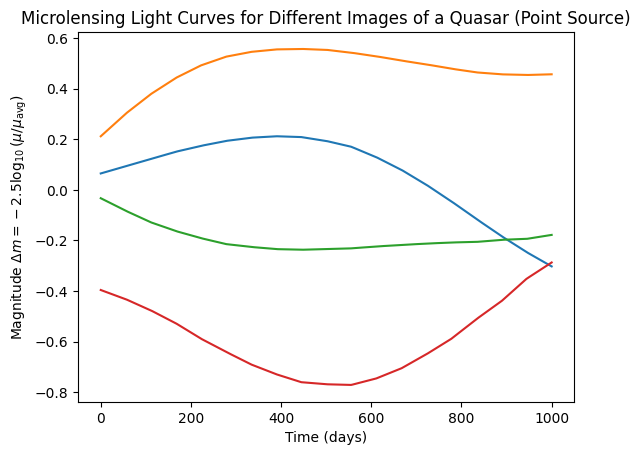

In [16]:
# plot the light curves
for i in range(len(LCs_lens)):
    plt.plot(np.linspace(0, 1000, 500), LCs_lens[i], label=f"Image {i+1}")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude $\Delta m = -2.5 \log_{10} (\mu/\mu_{\\text{avg}})$")
plt.title("Microlensing Light Curves for Different Images of a Quasar (Point Source)")

#### 2.2 AGN Disk

In [19]:
kwargs_MagnificationMap = {
    "theta_star": theta_star,  # arcsec
    "rectangular": True,
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 25 * theta_star,  # arcsec
    "half_length_y": 25 * theta_star,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 500,
    "num_pixels_y": 500,
}
kwargs_AccretionDisk = {
    "smbh_mass_exp": 8.0,
    "corona_height": 10,
    "inclination_angle": 0,
    "v_transverse": 10000,  # This is too fast for the AGN, typically 1000 km/s, but we are using 10000 km/s for longer lightcurves
    "observer_frame_wavelength_in_nm": 600,  # TODO: this needs to be connected with the band used for observations
    "eddington_ratio": 0.15,
    "mean_microlens_mass_in_kg": 1 * const.M_sun.to(u.kg),
    "min_disk_radius": 6,
}

ml_lc_lens = MicrolensingLightCurveFromLensModel()
LCs_lens = ml_lc_lens.generate_point_source_microlensing_magnitudes(
    time=np.linspace(0, 1000, 500),  # time in days
    source_redshift=source_redshift,
    deflector_redshift=deflector_redshift,
    kappa_star_images=kappa_star_images,
    kappa_tot_images=kappa_tot_images,
    shear_images=shear_images,
    cosmology=cosmology,
    kwargs_MagnificationMap=kwargs_MagnificationMap,
    kwargs_AccretionDisk=kwargs_AccretionDisk,  # we use the accretion disk model
)


Done shooting cells. Elapsed time: 0.107 seconds.

Generating star field...
Done generating star field. Elapsed time: 0 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.052 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.065 seconds.

Shooting cells...
100 %
Done shooting cells. Elapsed time: 0.064 seconds.

Generating star field...
Done generating star field. Elapsed time: 0 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.073 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.082 seconds.

Shooting cells...
100 %
Done shooting cells. Elapsed time: 0.132 seconds.

Generating star field...
Done generating star field. Elapsed time: 0 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. 

Text(0.5, 1.0, 'Microlensing Light Curves for Different Images of a Quasar (Accretion Disk Model)')

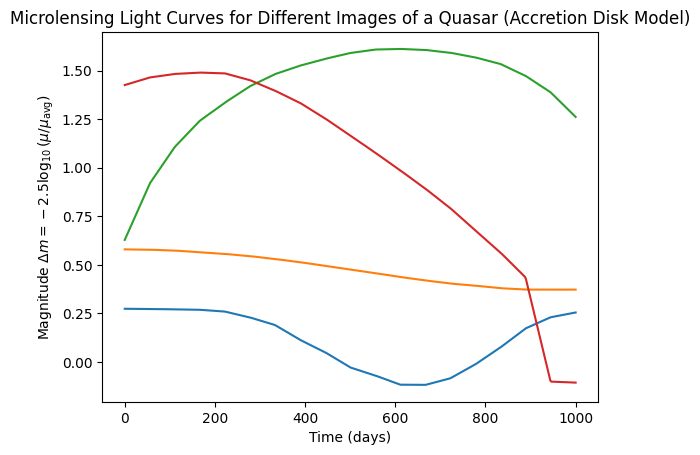

In [20]:
# plot the light curves
for i in range(len(LCs_lens)):
    plt.plot(np.linspace(0, 1000, 500), LCs_lens[i], label=f"Image {i+1}")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude $\Delta m = -2.5 \log_{10} (\mu/\mu_{\\text{avg}})$")
plt.title(
    "Microlensing Light Curves for Different Images of a Quasar (Accretion Disk Model)"
)

In [ ]:
kwargs_microlensing = {
    "kwargs_MagnificationMap": kwargs_MagnificationMap,
    "kwargs_PointSource": kwargs_PointSource,
}

magnitudes_microlensing_all_images = lens_class._point_source_magnitude_microlensing(
    band="i",
    time=np.linspace(0, 1000, 500),  # time in days
    source=lens_class.source[0],
    **kwargs_microlensing,
)

Text(0.5, 1.0, 'Microlensing Light Curves')

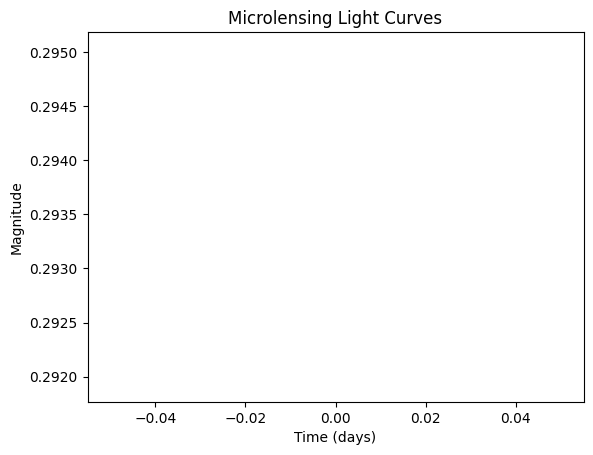

In [4]:
# plot all the lightcurves
fig, ax = plt.subplots()
for i in range(len(LCs_lens)):
    ax.plot(LCs_lens[i], label=f"Track {i+1}")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Magnitude")
ax.set_title("Microlensing Light Curves")

In [ ]:
# visualize the light curves for the images

# figure layout
# image rgb with 1, 2, 3 ... label to quasars | microlensing light curves
# num_images panels => for magnification maps and tracks

# use gridspec for subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

## TEST CODE!

In [14]:
def calculate_angular_einstein_radius(
    redshift_lens,
    redshift_source,
    cosmo,
    mean_microlens_mass_in_kg=1 * const.M_sun.to(u.kg),
):
    """This function calculates the Einstein radius of the microlens in radians.

    This assumes LCDM model.
    :param redshift_lens: redshift of the lensing galaxy
    :param redshift_source: redshift of the source
    :param mean_microlens_mass_in_kg: average mass of microlenses in the lensing galaxy.
        This is typically modeled between 0.1 and 1.0 solar masses
    :param cosmo: cosmology object from astropy
    :return: average Einstein radius in radians
    """
    D_lens = cosmo.angular_diameter_distance(redshift_lens)
    D_source = cosmo.angular_diameter_distance(redshift_source)
    D_LS = cosmo.angular_diameter_distance_z1z2(redshift_lens, redshift_source)

    value = (
        (4 * const.G * mean_microlens_mass_in_kg / const.c**2)
        * D_LS
        / (D_lens * D_source)
    ) ** (0.5)
    return value.value  # in radians


def calculate_einstein_radius_in_meters(
    redshift_lens,
    redshift_source,
    cosmo,
    mean_microlens_mass_in_kg=1 * const.M_sun.to(u.kg),
):
    """This function determines the einstein radius of the microlenses in physical
    lengths :param redshift_lens: redshift of the lensing galaxy :param redshift_source:
    redshift of the source :param mean_microlens_mass_in_kg: average mass of microlenses
    in the lensing galaxy.

    This is typically     modeled between 0.1 and 1.0 solar masses
    :param cosmo: cosmology object from astropy
    :return: average Einstein radius of the microlenses in meters
    """
    ang_diam_dist_source_plane = cosmo.angular_diameter_distance(redshift_source)
    ein_rad_in_radians = calculate_angular_einstein_radius(
        redshift_lens,
        redshift_source,
        cosmo,
        mean_microlens_mass_in_kg=mean_microlens_mass_in_kg,
    )
    value = ang_diam_dist_source_plane * ein_rad_in_radians
    return value


def theta_star_physical(
    z_lens: float, z_src: float, m: float = 1, cosmo=FlatLambdaCDM(H0=70, Om0=0.3)
) -> tuple:
    """
    Calculate the size of the Einstein radius of a point mass lens in the
    lens and source planes, in meters

    :param z_lens: lens redshift
    :param z_src: source redshift
    :param m: point mass lens mass in solar mass units
    :param cosmo: an astropy.cosmology instance. default is Planck18

    :return theta_star_lens: theta_star in the lens plane in meters
    :return theta_star_src: theta_star in the source plane in meters
    """
    microlens_mass = m * u.M_sun

    D_d = cosmo.angular_diameter_distance(z_lens)
    D_s = cosmo.angular_diameter_distance(z_src)
    D_ds = cosmo.angular_diameter_distance_z1z2(z_lens, z_src)

    theta_star_lens = np.sqrt(
        4 * const.G * microlens_mass / const.c**2 * D_d * D_ds / D_s
    )
    theta_star_src = theta_star_lens * D_s / D_d

    return theta_star_lens.to(u.m), theta_star_src.to(u.m)

In [26]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

source_redshift = 2.467248566851947
deflector_redshift = 0.6688619611721243
mean_microlens_mass = 1 * const.M_sun


D_lens_source = cosmo.angular_diameter_distance_z1z2(
    deflector_redshift, source_redshift
)
D_lens = cosmo.angular_diameter_distance(deflector_redshift)
D_source = cosmo.angular_diameter_distance(source_redshift)
theta_star = (
    np.sqrt(
        4
        * const.G
        * mean_microlens_mass
        / (const.c**2)
        * D_lens_source
        / (D_lens * D_source)
    )
    * u.rad
)
theta_star_source = theta_star.to(u.rad).value * D_source.to(u.m)
theta_star_lens = theta_star.to(u.rad).value * D_lens.to(u.m)
print("theta_star: ", theta_star.to(u.arcsec))
print(f"theta_star_source: {theta_star_source.to(u.m):.2e}")
print(f"theta_star_lens: {theta_star_lens.to(u.m):.2e}")


# using theta_star_physical function
theta_star_lens, theta_star_src = theta_star_physical(
    z_lens=deflector_redshift,
    z_src=source_redshift,
    cosmo=cosmo,
    m=1,
)
print(f"MICROLENSING FUNCTION")
print(f"theta_star_lens: {theta_star_lens:.2e}")
print(f"theta_star_src: {theta_star_src:.2e}")


# using calculate_angular_einstein_radius function
theta_E_src = calculate_einstein_radius_in_meters(
    redshift_lens=deflector_redshift,
    redshift_source=source_redshift,
    cosmo=cosmo,
    mean_microlens_mass_in_kg=mean_microlens_mass.to(u.kg),
).to(u.m)
theta_E = theta_E_src / D_source.to(u.m)
print(f"calculate_angular_einstein_radius function")
print(f"theta_E: {theta_E:.2e}")
print(f"theta_E_src: {theta_E_src:.2e}")

theta_star:  1.811479575016381e-06 arcsec
theta_star_source: 4.52e+14 m
theta_star_lens: 3.92e+14 m
MICROLENSING FUNCTION
theta_star_lens: 3.92e+14 m
theta_star_src: 4.52e+14 m
calculate_angular_einstein_radius function
theta_E: 1.54e+00
theta_E_src: 7.95e+25 m
